2016
Predicted Total IPC Crimes: [50.58333333]
2017
Predicted Total IPC Crimes: [30.33333333]
2018
Predicted Total IPC Crimes: [10.08333333]
2019
Predicted Total IPC Crimes: [10.16666667]


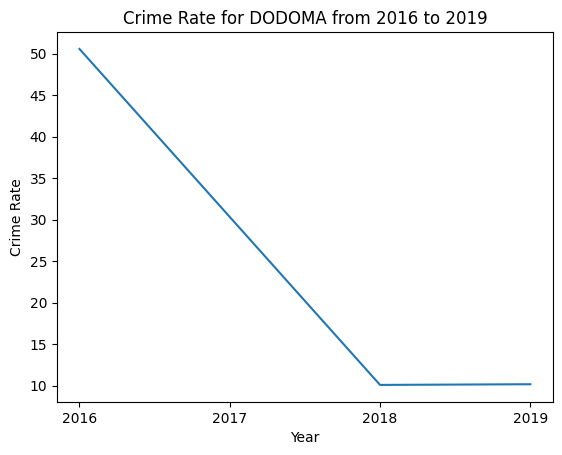

In [11]:
# import the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
# load the crime data

def predict(state,year,crime):
    crime_data = pd.read_excel('static/assets//fulldata/fulldata.xlsx')

    # convert the STATE_UT column to one-hot encoded binary columns
    encoder = OneHotEncoder(sparse=False)
    state_encoded = encoder.fit_transform(crime_data[['STATE_UT']])
    state_labels = encoder.categories_[0]

    state_df = pd.DataFrame(state_encoded, columns=[f'STATE_UT_{label}' for label in state_labels])

    # combine the one-hot encoded state columns with the rest of the data
    X = pd.concat([state_df, crime_data[['YEAR']]], axis=1)
    y = crime_data[crime]

    # create a linear regression model and fit it on the data
    model = LinearRegression()
    model.fit(X, y)


    # take input values for state and year
        # state = 'DODOMA'
        # year = 2021
    years = []
    crime_rates = []
    for i in range(2016,year+1):
    # create a dataframe with the input values
        input_data = pd.DataFrame({'STATE_UT': [state], 'YEAR': [i]})
        input_state_encoded = encoder.transform(input_data[['STATE_UT']])
        input_state_df = pd.DataFrame(input_state_encoded, columns=[f'STATE_UT_{label}' for label in state_labels])
        input_data = pd.concat([input_state_df, input_data[['YEAR']]], axis=1)

        # predict the total IPC crimes for the input values
        predicted_ipc_crimes = model.predict(input_data)

        # print the predicted total IPC crimes
        print(i)
        print('Predicted Total IPC Crimes:', abs(predicted_ipc_crimes))
        
        years.append(int(i))
        crime_rates.append(abs(predicted_ipc_crimes[0]))

    # plot the line graph of crime rate against year
    plt.plot(years, crime_rates)
    plt.xticks(years)  # set the x-axis ticks to show all the years
    plt.xlabel('Year')
    plt.ylabel('Crime Rate')
    plt.title(f'Crime Rate for {state} from 2016 to {year}')
    plt.show()

predict('DODOMA',2019,'UNNATURAL_OFFENCE')